In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import torch.nn.functional as F

In [2]:
data=pd.read_csv('winequality-red.csv',sep=';')
data=data[data['total sulfur dioxide']<200]
X=data.drop('quality',axis=1)
y=data.quality
X=X.apply(stats.zscore)
y=y.to_frame()
data['boolQuality']=0
data.loc[data['quality']>5,'boolQuality']=1


In [3]:
Xt=torch.tensor(X.values).float()
yt=torch.tensor(data.boolQuality.values).float()
print(Xt.shape)
print(yt.shape)

torch.Size([1597, 11])
torch.Size([1597])


In [4]:
yt=yt[:,None]
yt.shape

torch.Size([1597, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
Xt, yt, test_size=0.3, random_state=42)
train_data=TensorDataset(X_train,y_train)
test_data=TensorDataset(X_test,y_test)

train_loader=DataLoader(train_data,batch_size=32,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [6]:
class ANNWine(nn.Module):
    def __init__(self,actfun):
        super().__init__()
        
        self.input=nn.Linear(11,16)
        
        self.fc1=nn.Linear(16,32)
        
        self.fc2=nn.Linear(32,16)
        
        
        self.output=nn.Linear(16,1)
        self.actfun=actfun   
         
    def forward(self,x):
        actfun=getattr(torch,self.actfun)
        
        x=actfun(self.input(x))
        
        
        
        x=actfun(self.fc1(x))
        x=actfun(self.fc2(x))
            
        return self.output(x)
            
         

In [7]:
net=ANNWine('sigmoid')
net(torch.randn(10,11)).shape

torch.Size([10, 1])

In [8]:
numepochs=1000
def trainModel():
    lossfun=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.SGD(ANNwine.parameters(),lr=0.01)
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epochi in range(numepochs):
        ANNwine.train()
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNwine(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y=next(iter(test_loader))
        ANNwine.eval()
        with torch.no_grad():
           
            
        
            testAcc.append(100*torch.mean(((ANNwine(X)>0)==y).float()).item())
        
    return trainAcc,testAcc,losses
             

In [18]:
activation_funs=['relu','tanh','sigmoid']
trainByAct=np.zeros((numepochs,len(activation_funs)))
testByAct=np.zeros((numepochs,len(activation_funs)))
for ai ,actfun in enumerate(activation_funs):
    ANNwine=ANNWine(actfun)
    trainByAct[:,ai],testByAct[:,ai],losses=trainModel()

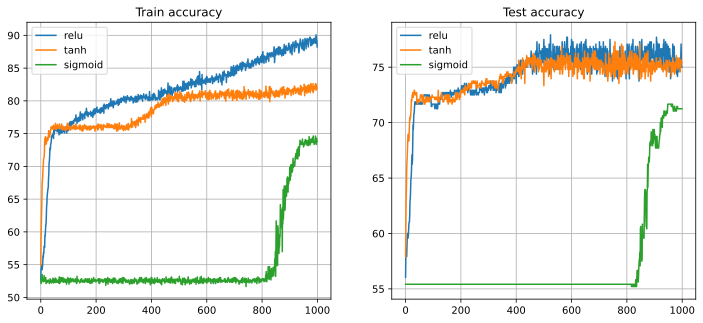

In [22]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(trainByAct)
ax[0].set_title('Train accuracy')
ax[1].plot(testByAct)
ax[1].set_title('Test accuracy')
for i in range(2):
    ax[i].legend(activation_funs)
    ax[i].grid()
    

In [20]:
class ANNWine(nn.Module):
    def __init__(self,actfun):
        super().__init__()
        
        self.input=nn.Linear(11,16)
        
        self.fc1=nn.Linear(16,32)
        
        self.fc2=nn.Linear(32,16)
        
        
        self.output=nn.Linear(16,1)
        self.actfun=actfun   
         
    def forward(self,x):
        actfun=getattr(nn,self.actfun)
        
        x=actfun()(self.input(x))
        
        
        
        x=actfun()(self.fc1(x))
        x=actfun()(self.fc2(x))
            
        return self.output(x)
            
         

In [21]:
numepochs=1000
def trainModel():
    lossfun=nn.BCEWithLogitsLoss()
    optimizer=torch.optim.SGD(ANNwine.parameters(),lr=0.01)
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epochi in range(numepochs):
        ANNwine.train()
        batchAcc=[]
        batchLoss=[]
        for X,y in train_loader:
            yHat=ANNwine(X)
            loss=lossfun(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
            batchLoss.append(loss.item())
            
        trainAcc.append(np.mean(batchAcc))
        losses.append(np.mean(batchLoss))
        
        X,y=next(iter(test_loader))
        ANNwine.eval()
        with torch.no_grad():
           
            
        
            testAcc.append(100*torch.mean(((ANNwine(X)>0)==y).float()).item())
        
    return trainAcc,testAcc,losses
             

In [ ]:
activation_funs=['ReLU','ReLU6','Leaky_ReLU']
trainByAct=np.zeros((numepochs,len(activation_funs)))
testByAct=np.zeros((numepochs,len(activation_funs)))
for ai ,actfun in enumerate(activation_funs):
    ANNwine=ANNWine(actfun)
    trainByAct[:,ai],testByAct[:,ai],losses=trainModel()

In [23]:
getattr(nn,'Leaky-ReLU')

AttributeError: module 'torch.nn' has no attribute 'Leaky-ReLU'